In [ ]:
# Download das imagens a serem utilizadas

!wget https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif
!wget http://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg

--2021-03-03 05:02:36--  https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif
Resolving people.math.sc.edu (people.math.sc.edu)... 129.252.1.14
Connecting to people.math.sc.edu (people.math.sc.edu)|129.252.1.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65240 (64K) [image/tiff]
Saving to: ‘cameraman.tif.1’

cameraman.tif.1     100%[===================>]  63.71K  --.-KB/s    in 0.05s   

2021-03-03 05:02:36 (1.34 MB/s) - ‘cameraman.tif.1’ saved [65240/65240]

--2021-03-03 05:02:36--  http://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:80... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg [following]
--2021-03-03 05:02:37--  https://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:

In [ ]:
import imageio
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
def plot1(image, label=None, colormap="gray"):
  imgplot = plt.imshow(image, cmap=colormap)
  plt.show()

def plot2(firstimage, secondimage, firstlabel=None, secondlabel=None, colormap="gray"):
  figure = plt.figure(figsize=(10,10))

  imgplot = figure.add_subplot(1,2,1)
  plt.imshow(firstimage, cmap=colormap)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,2,2)
  plt.imshow(secondimage, cmap=colormap)
  imgplot.set_xlabel(secondlabel)

def plot4(firstimage, secondimage, thirdimage, fourthimage, firstlabel=None, secondlabel=None, thirdlabel=None, fourthlabel=None, colormap="gray"):
  figure = plt.figure(figsize=(15,15))

  imgplot = figure.add_subplot(1,4,1)
  plt.imshow(firstimage, cmap=colormap)
  imgplot.set_xlabel(firstlabel)

  imgplot = figure.add_subplot(1,4,2)
  plt.imshow(secondimage, cmap=colormap)
  imgplot.set_xlabel(secondlabel)

  imgplot = figure.add_subplot(1,4,3)
  plt.imshow(thirdimage, cmap=colormap)
  imgplot.set_xlabel(thirdlabel)

  imgplot = figure.add_subplot(1,4,4)
  plt.imshow(fourthimage, cmap=colormap)
  imgplot.set_xlabel(fourthlabel)  

# Questão 1

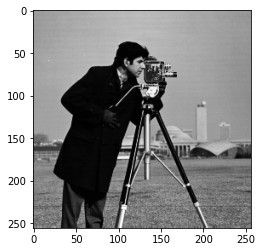

In [ ]:
img_cman = imageio.imread("cameraman.tif")
plot1(img_cman)

# Questão 2

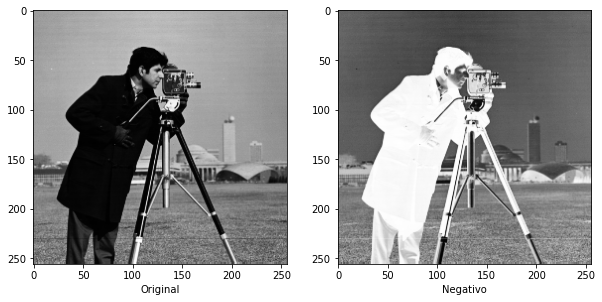

In [ ]:
img_cman_neg = 255 - img_cman
plot2(img_cman, img_cman_neg, "Original", "Negativo")

# Questão 3

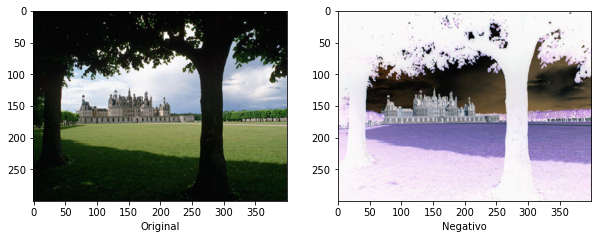

In [ ]:
img_chateau = imageio.imread("Chateau_small.jpg")

img_chateau_neg = 255 - img_chateau

plot2(img_chateau, img_chateau_neg, "Original", "Negativo", colormap=None)

# Questão 4

### Filtro Gaussiano

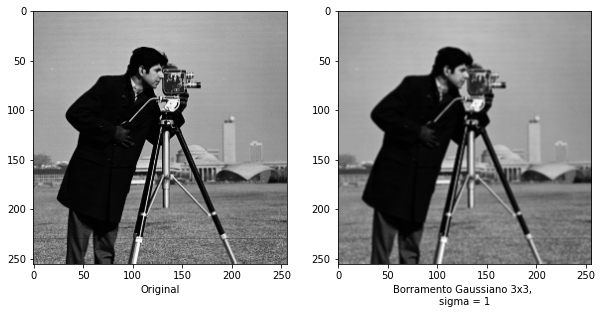

In [ ]:
gaussiankernel = np.array([[0.0625, 0.125, 0.0625],
                          [0.125, 0.25, 0.125],
                          [0.0625, 0.125, 0.0625]])

img_blur_3x3 = np.uint8(sp.ndimage.convolve(img_cman, gaussiankernel))

plot2(img_cman, img_blur_3x3, "Original", "Borramento Gaussiano 3x3, \nsigma = 1")

### Filtro Gaussiano 3x

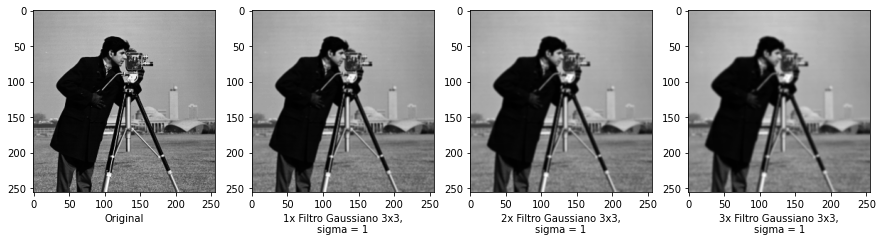

In [ ]:
img_blur_01 = np.uint8(sp.ndimage.convolve(img_cman, gaussiankernel))
img_blur_02 = np.uint8(sp.ndimage.convolve(img_blur_01, gaussiankernel))
img_blur_03 = np.uint8(sp.ndimage.convolve(img_blur_02, gaussiankernel))

plot4(img_cman, img_blur_01, img_blur_02, img_blur_03, "Original", "1x Filtro Gaussiano 3x3,\nsigma = 1", 
      "2x Filtro Gaussiano 3x3,\nsigma = 1", "3x Filtro Gaussiano 3x3,\nsigma = 1")

### Filtro Laplaciano

[[   0  156  159 ...  152  152    0]
 [ 156 -305 -168 ... -150 -303  152]
 [ 160 -174   19 ...   -9 -153  153]
 ...
 [ 121 -123    5 ...   -7  -95  113]
 [ 121 -237 -127 ... -144 -209  113]
 [   0  121  126 ...  130  113    0]]
[[   0 -156 -159 ... -152 -152    0]
 [-156  305  168 ...  150  303 -152]
 [-160  174  -19 ...    9  153 -153]
 ...
 [-121  123   -5 ...    7   95 -113]
 [-121  237  127 ...  144  209 -113]
 [   0 -121 -126 ... -130 -113    0]]


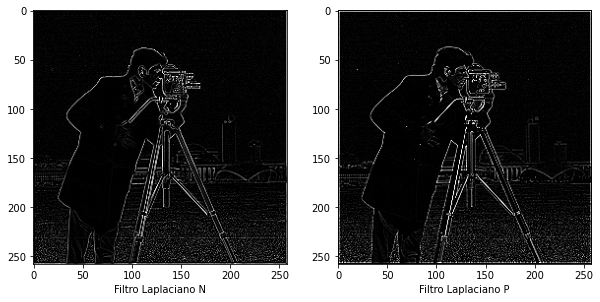

In [ ]:
from scipy import signal

laplaciankernel_n = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

laplaciankernel_p = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])

print(signal.convolve2d(img_cman, laplaciankernel_n))
print(signal.convolve2d(img_cman, laplaciankernel_p))

img_ln = np.uint8(np.clip(signal.convolve2d(img_cman, laplaciankernel_n), 0, 255))
img_lp = np.uint8(np.clip(signal.convolve2d(img_cman, laplaciankernel_p), 0, 255))

plot2(img_ln, img_lp, "Filtro Laplaciano N", "Filtro Laplaciano P")

### Filtro High Boost

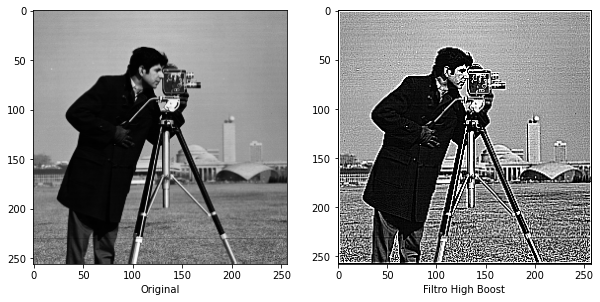

In [ ]:
highboost = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])

img_hb = np.uint8(np.clip(signal.convolve2d(img_cman, highboost), 0, 255))

plot2(img_cman, img_hb, "Original", "Filtro High Boost")

### Filtro Prewitt Horizontal

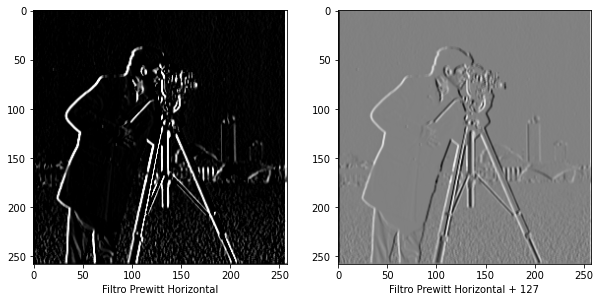

In [ ]:
prewitt_h = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

img_ph = np.uint8(np.clip(signal.convolve2d(img_cman, prewitt_h), 0, 255))
img_ph_127 = signal.convolve2d(img_cman, prewitt_h) + 127

plot2(img_ph, img_ph_127, "Filtro Prewitt Horizontal", "Filtro Prewitt Horizontal + 127")

### Filtro Prewitt Horizontal Negativo

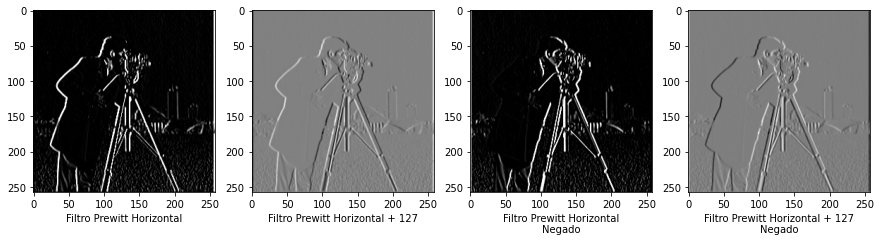

In [ ]:
prewitt_h_neg = (-1) * prewitt_h

img_ph_neg = np.uint8(np.clip(signal.convolve2d(img_cman, prewitt_h_neg), 0, 255))
img_ph_neg_127 = signal.convolve2d(img_cman, prewitt_h_neg) + 127

plot4(img_ph, img_ph_127, img_ph_neg, img_ph_neg_127, "Filtro Prewitt Horizontal", "Filtro Prewitt Horizontal + 127",
      "Filtro Prewitt Horizontal\nNegado", "Filtro Prewitt Horizontal + 127\nNegado")

### Filtro Prewitt Vertical

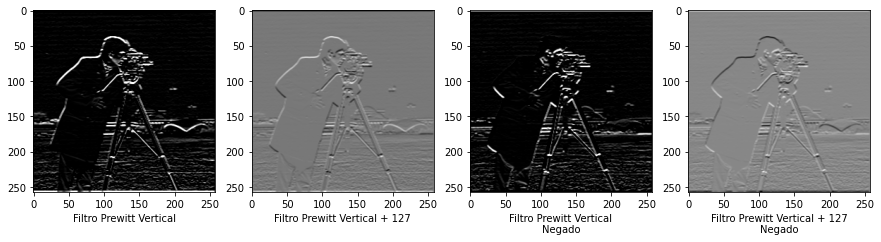

In [ ]:
prewitt_v = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

img_pv = np.uint8(np.clip(signal.convolve2d(img_cman, prewitt_v), 0, 255))
img_pv_127 = signal.convolve2d(img_cman, prewitt_v) + 127

prewitt_v_neg = (-1) * prewitt_v

img_pv_neg = np.uint8(np.clip(signal.convolve2d(img_cman, prewitt_v_neg), 0, 255))
img_pv_neg_127 = signal.convolve2d(img_cman, prewitt_v_neg) + 127

plot4(img_pv, img_pv_127, img_pv_neg, img_pv_neg_127, "Filtro Prewitt Vertical", "Filtro Prewitt Vertical + 127",
      "Filtro Prewitt Vertical\nNegado", "Filtro Prewitt Vertical + 127\nNegado")

# Questão 5

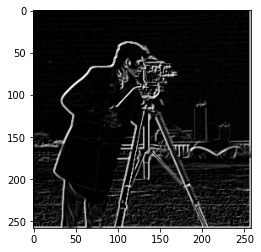

In [ ]:
from math import sqrt 

mag_grad = []

img_ph_np = np.asarray(img_ph)
img_pv_np = np.asarray(img_pv)

for row in range(img_ph_np.shape[1]):
  new_row = []
  for column in range(img_ph_np.shape[0]):
    new_row.append(sqrt((img_ph_np[row][column])**2 + (img_pv_np[row][column])**2))
  mag_grad.append(new_row)

plt.imshow(np.asarray(mag_grad), cmap = "gray")

# Questão 6

In [ ]:
img_ph_np = np.asarray(img_ph)
img_pv_np = np.asarray(img_pv)

mag_grad = np.sqrt(np.add(np.multiply(img_ph_np, img_ph_np), np.multiply(img_pv_np, img_pv_np)))
plt.imshow(mag_grad, cmap = "gray")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3fc0715320> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>